
# Project: No Show Appointment in Brazil

> For more info about the dataset visit [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments) 
> 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



<a id='intro'></a>
# Introduction

In [1162]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


%config InlineBackend.figure_format = 'retina'
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>

# Data Wrangling

**a) Any null values? 
 No!**

In [1163]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**b) What about data type for columns? Any thing to be changed?**

In [1164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Yes, change ScheduledDay and AppointmentDay to DateTime instead of object so you can work easily with them**

In [1165]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [1166]:
# Changed the name of No-show column since Pandas is not happy with No at the begining!
df=df.rename(columns = {'No-show':'Not_show'})

**c) Are Yes and No the only input to the data in Not_show?  **



In [1167]:
df.count()[-1] == df.query('Not_show == "Yes"').count()[-1] + df.query('Not_show == "No"').count()[-1]


True

**d) What about the range of the numbers? Do they have realistic values?** 

In [1168]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


** All columns seems to have normal values except age with min of -1 and Handcap with a max value of 4 **


What to do?
Remove the rows containing such values

In [1169]:
df.drop(df[df.Age < 0].index, inplace=True)
df.drop(df[df.Handcap >1].index, inplace=True)


What to do next? Check if they are removed.

In [1170]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**It seems that we got rid of the unlogical values correctly**

<a id='eda'></a>

# Exploratory Data Analysis

**1- Does gender play role in missing the appointmnet?**

In [1171]:

# find the total number of males and females 
n_females = df.groupby(['Gender'])['Gender'].count()[0]
n_male = df.groupby(['Gender'])['Gender'].count()[1]

# find the total number of males and females who misses the appointment
females_no_show = df.groupby(['Gender','Not_show'])['Not_show'].count()[1]
males_no_show = df.groupby(['Gender','Not_show'])['Not_show'].count()[3]

# Show results
print('Percentage of females who misses the appointment: %0.2f%%'%(females_no_show/n_females*100))
print('Percentage of males who misses the appointment: %0.2f%%'%(males_no_show/n_male*100))

Percentage of females who misses the appointment: 20.31%
Percentage of males who misses the appointment: 19.98%


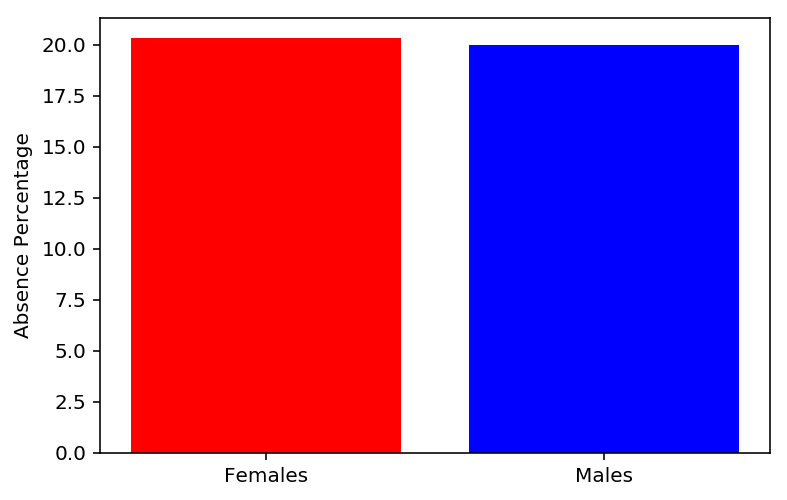

In [1172]:
plt.bar(['Females','Males'],[(females_no_show/n_females*100),(males_no_show/n_male*100)],color=['r','b']);
plt.ylabel('Absence Percentage');

** 2- Does scholarship play a role in missing the appointmnet? **

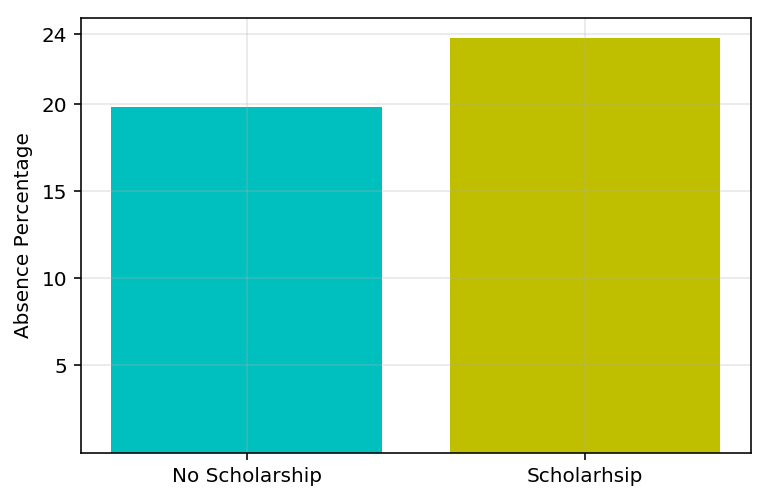

In [1173]:
n_no_scholar = df.groupby(['Scholarship'])['Scholarship'].count()[0]
n_scholar = df.groupby(['Scholarship'])['Scholarship'].count()[1]

no_scholar_no_show = df.groupby(['Scholarship','Not_show'])['Not_show'].count()[0][1]
scholar_no_show = df.groupby(['Scholarship','Not_show'])['Not_show'].count()[1][1]

plt.bar(['No Scholarship','Scholarhsip'],[(no_scholar_no_show/n_no_scholar*100),(scholar_no_show/n_scholar*100)],color=['c','y']);
plt.ylabel('Absence Percentage');
plt.grid(alpha=0.3)
plt.yticks([5,10,15,20,24])
print()

** From the results above, it seems that gender has no strong affect on missing the appointment, although males seem to miss a bit more. However, this might be accounted for by the errors of the raw data**

**3- Does age play role in missing the appointmnet?**

First, count how many people don't show up relative to their age. The results was normalized relative to each age group to avoid any bias in the sampling since young people are represetend at higher number 



In [1174]:
df_not_show = df.query('Not_show == "Yes"')



In [1175]:
def propotion(not_show,df,col=['Age']):
    not_show_prop = not_show.groupby(col)['Not_show'].count()/df.groupby(col[0])['Age'].count()*100
    return not_show_prop

age_not_show = propotion(df_not_show,df)

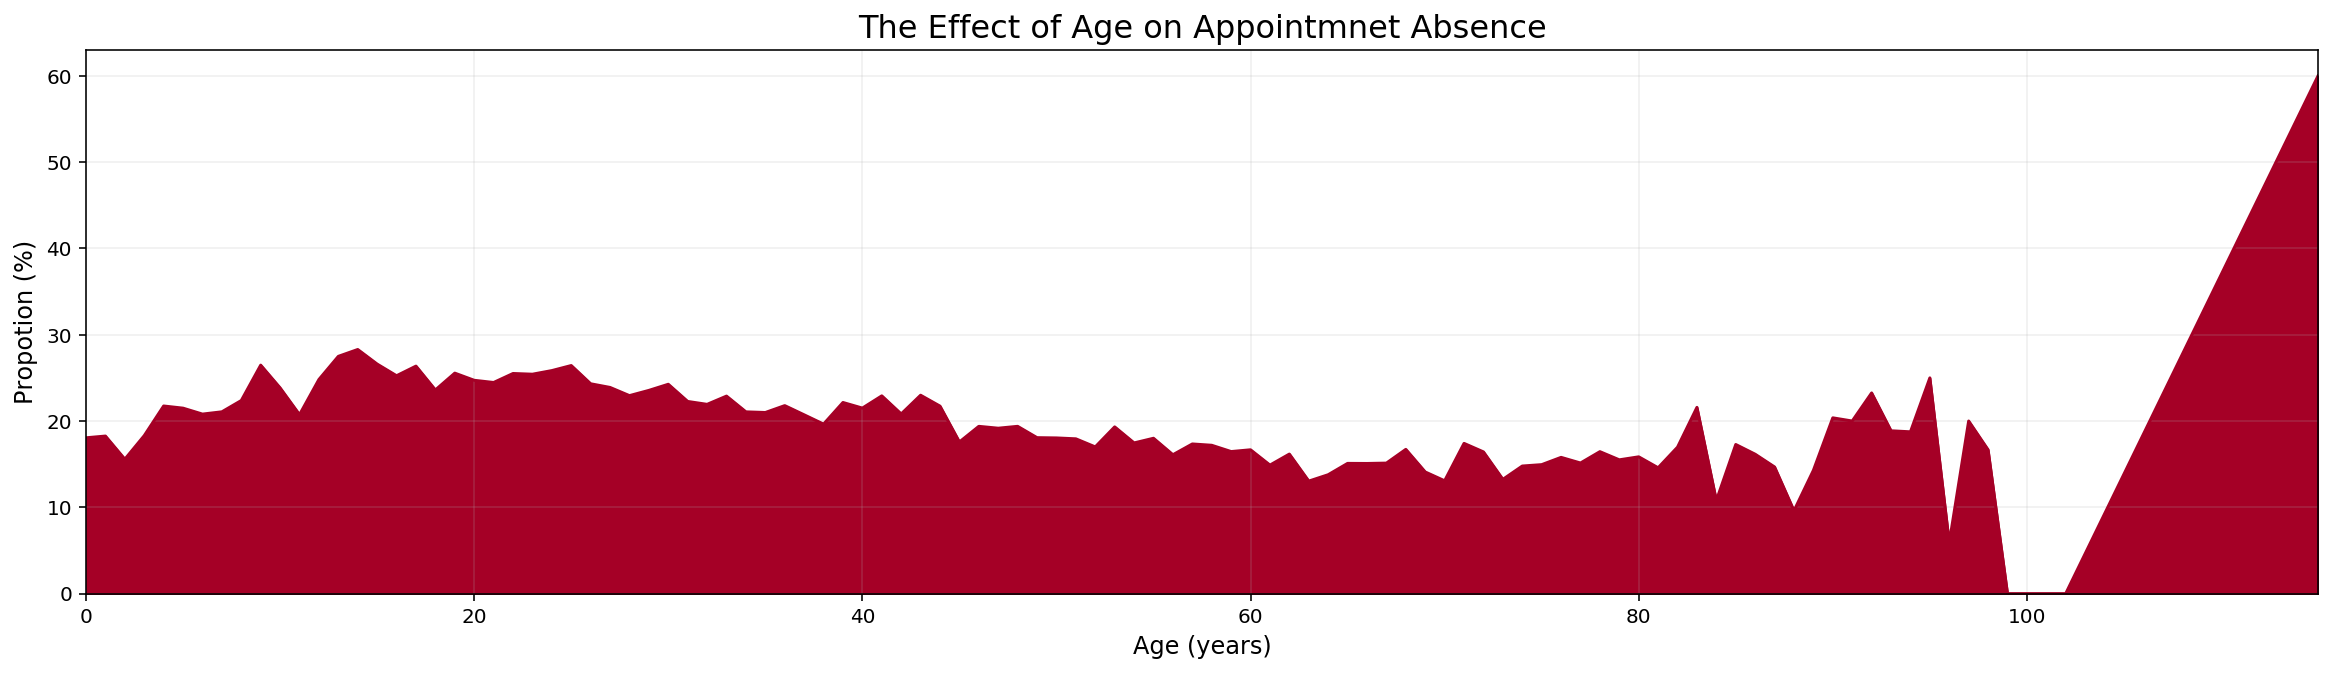

In [1176]:
def plot_age(age_not_show,figsize=(20,5),grid=True,colormap='RdYlGn'):
    age_not_show.plot(kind='area',figsize=figsize,grid=grid,colormap=colormap);
    plt.ylabel('Propotion (%)',fontsize=12);
    plt.xlabel('Age (years)',fontsize=12);
    plt.title('The Effect of Age on Appointmnet Absence',fontsize=16)
    plt.grid(alpha=0.2)
    return


plot_age(age_not_show)

Seems like data after around 95 is not significant due to limited sampling (less than 30). Therefore, it's gonna be deleted. 

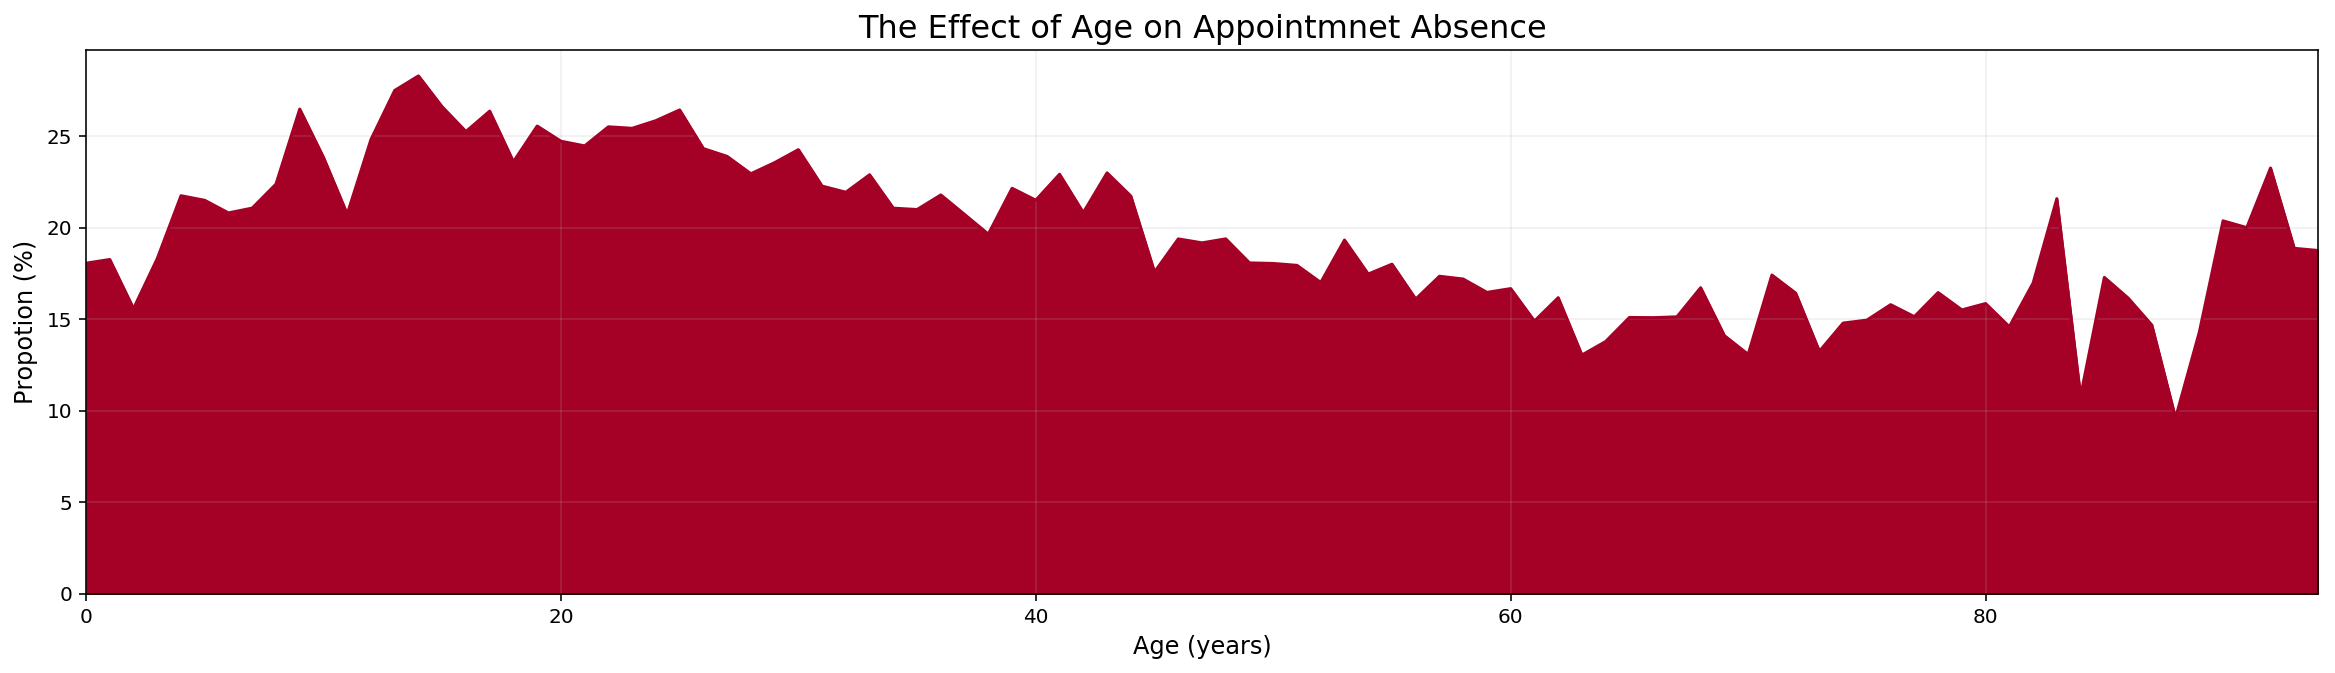

In [1177]:
'''
Get rid of outliers with limited sampling < 30. It happens that Age above 95 has less than 30 samples, 
which is by the central limit theorem cannot be safely assumed normal
http://www2.psychology.uiowa.edu/faculty/mordkoff/GradStats/part%201/I.07%20normal.pdf
'''

df_not_show_good_sampling = df.query('Not_show == "Yes" and Age < 95')
df_normal_good_sampling = df.query('Age < 95')

# Get propotion
age_not_show = propotion(df_not_show_good_sampling,df_normal_good_sampling) 
# Plot
plot_age(age_not_show)

**4- Does neighborhour play role in missing the appointmnet?**

In [1178]:
location_not_show = propotion(df_not_show,df,col=['Neighbourhood']) # Implementation of a function


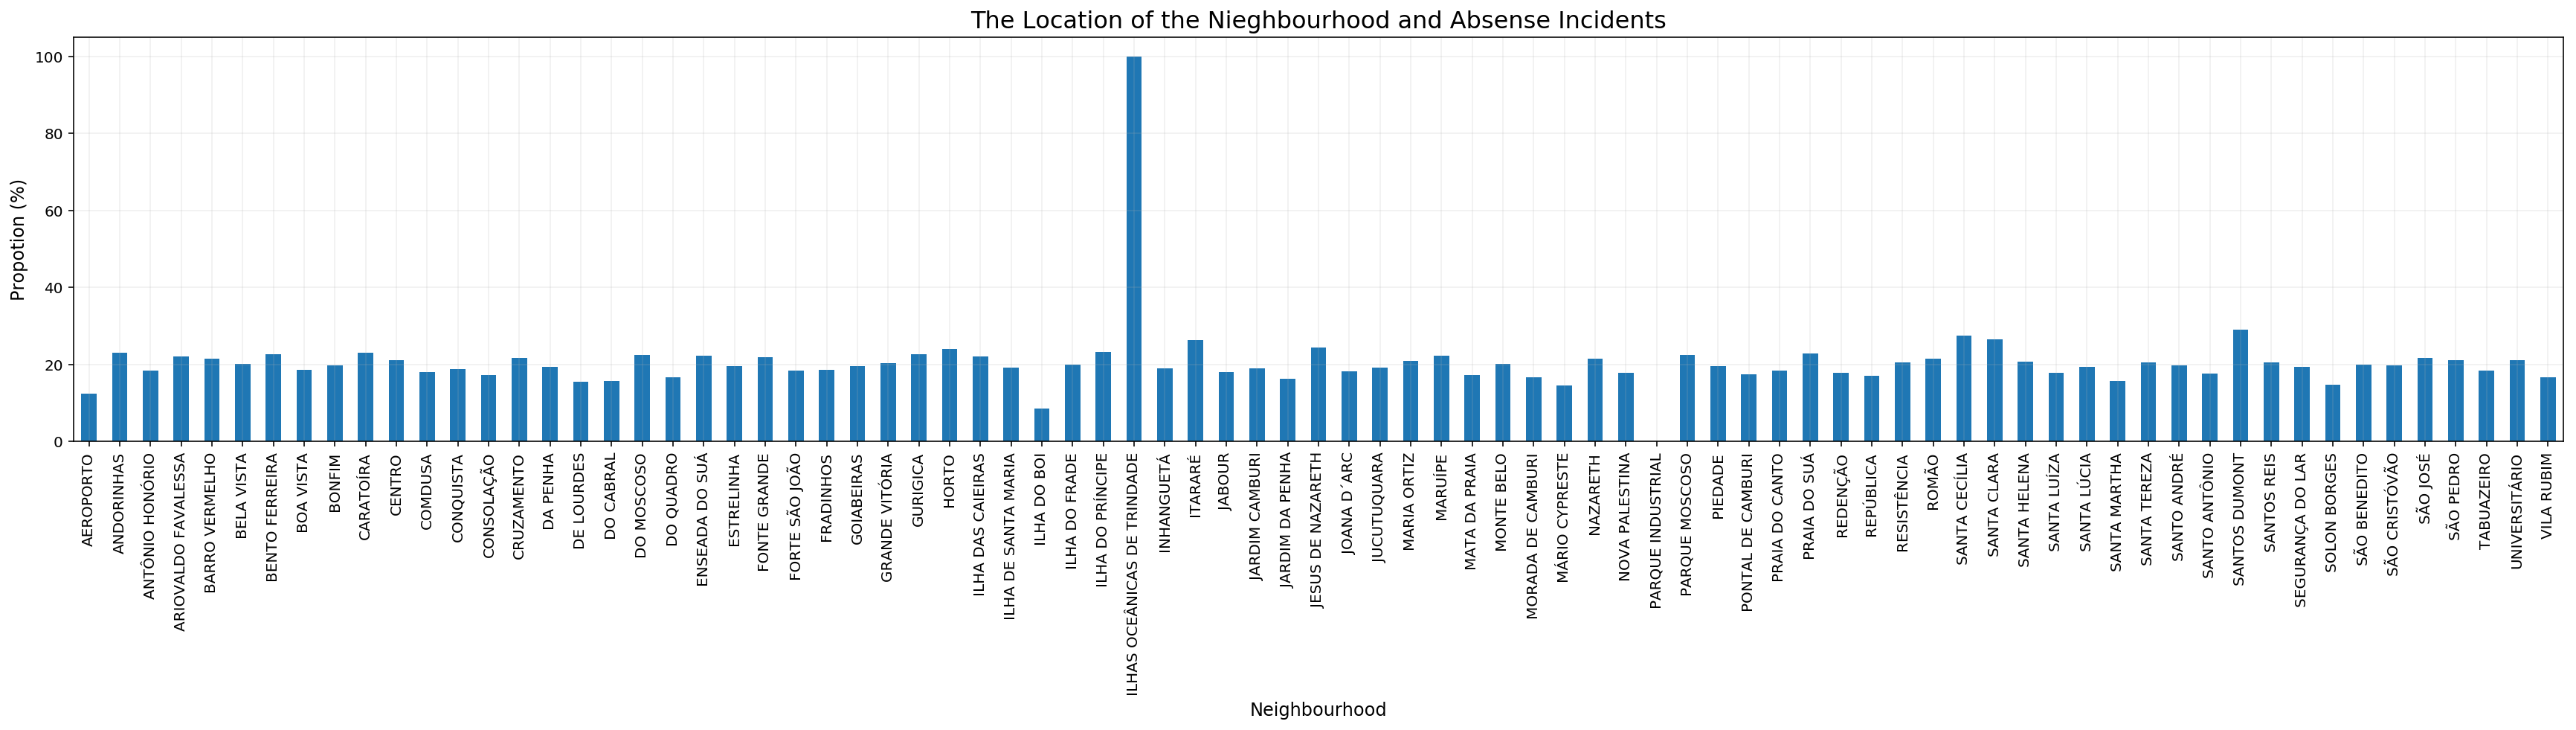

In [1179]:
def plt_location(loc,fig_size=(30,5),grid=True):
    loc.plot(kind='bar',figsize=fig_size,grid=grid);
    plt.ylabel('Propotion (%)',fontsize=12);
    plt.xlabel('Neighbourhood',fontsize=12);
    plt.title("The Location of the Nieghbourhood and Absense Incidents",fontsize=16)
    plt.grid(alpha=0.2)
    return 


plt_location(location_not_show)


Remove the two outliers

In [1180]:
location_not_show = location_not_show.drop(['PARQUE INDUSTRIAL','ILHAS OCEÂNICAS DE TRINDADE'])

In [1181]:
mean_location = location_not_show.mean()
std_location = location_not_show.std()

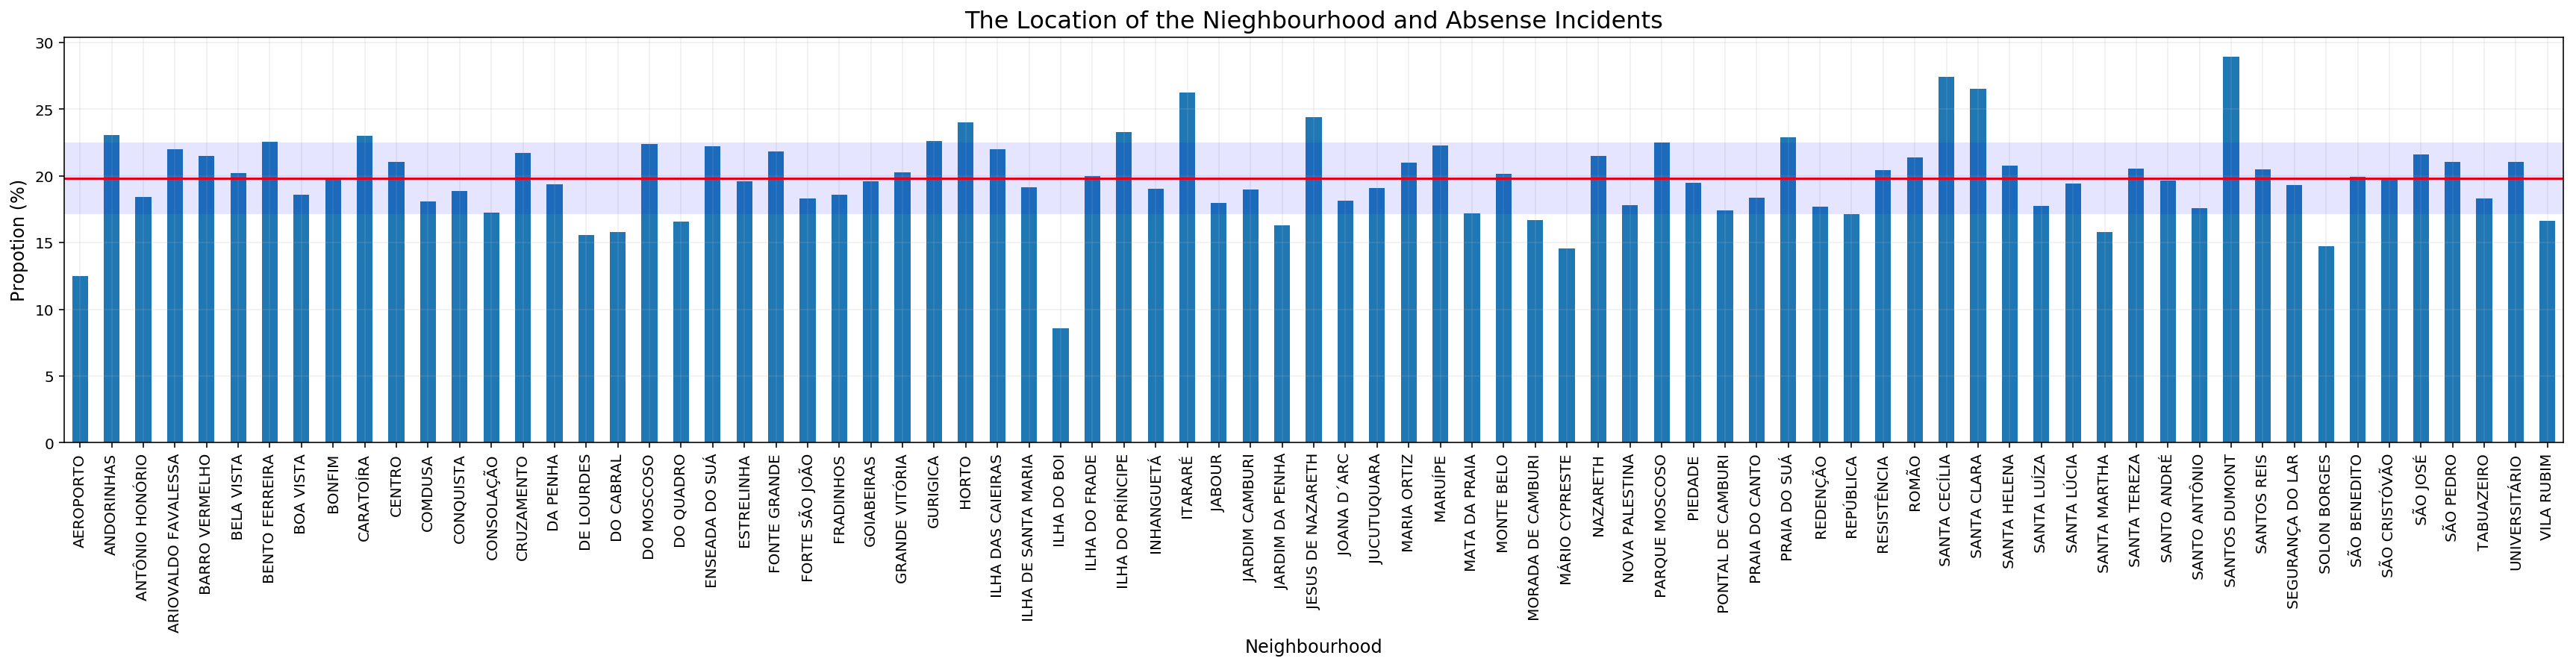

In [1182]:
plt_location(location_not_show) # Implementation of a function

plt.axhline(y=mean_location, color='r', linestyle='-');
plt.axhline(y=mean_location, color='b', linestyle='-',lw=48,alpha=0.1); # standard deviation



<a id='conclusions'></a>
# Conclusion

From the data above, it seems that the gender does not have a significant effect on whether the person will be absent. The percentage were around 20% for both genders. 

For the second factor, it seems that the scholarhip have a strong impact on whether the person would miss the appointment or not. The paitent is 25% likely to miss the appoitnment if they have a schoalrhsip while 20% if they have not scholarship. The reason for this could be due to the fact that free resources in a lot of cases are not misused. It also could be atrributed to other factors such as acess to transportation. The people with the scholarship are impovirshed and may not afford the cost of the visit! 

For the third factor, age, it seems that people under the age of 40 are at a higher risk of being absent at around 20-25%, while people between 50-90 have a risk of around 15%. Above the age of 90, the percentage seems to go up reaching a maximum value of 60% at the age of 115. However, the last few values are not statistically siginifcant since the number of samples is very limited. 

For the last factor, the neighbourhood effect, there were two outliers in this data set. The first one in ILHAS OCEÂNICAS DE TRINDADE gave 100% of not showing up, but there were only two people from that neighborhood, which is not enough to conclude anything. Similar thing goes to PARQUE INDUSTRIAL where only one person was mentioned from that area. Some neighbourhood were doing better than others, for examlpe, Ilha Do Boi have an absense of only 8%, which is considerably lower than most neighbourhood and below the average by three standard deviation. Maybe the location of that neighbourhood is close to the healthcare provider, or maybe something else such as income or education is responsible for this effect. 

After removing the outliers, things are much easier to compare. There are not some neighbourhood that have higher than average 20% such as Santos Dumont reaching nearly 28%.

** Limitation **

No informaiton was given about the way the information was collected. It could be manually done on papers, increasing the potential for errors. One factor that I wanted to see is the location of the healthcare provider relative to the area where the patient lives. It may have correlation to the appointment absense. Another factor that I see is missing from that data is the exact time of the appointment. People may tend to miss certain times more than others due ot work or sleep schedule. 